# Visualizing Geospatial Data in Python

The following tutorial shows how to use two popular geospatial libraries in Python:

  - [`geopandas`](https://geopandas.org/): extends Pandas to allow spatial operations on geometric types
  - [`geoplot`](https://residentmario.github.io/geoplot/index.html): a high-level geospatial plotting library

To import the required packages for Python:

In [45]:
import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
import pandas as pd
import matplotlib.pyplot as plt
import mapclassify as mc

%matplotlib inline

Then to load a shapefile and view a portion of it:

In [46]:
usa = gpd.read_file("maps/cb_2018_us_state_20m.shp")
usa.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,24,01714934,0400000US24,24,MD,Maryland,00,25151100280,6979966958,"MULTIPOLYGON (((-76.04621 38.02553, -76.00734 ..."
1,19,01779785,0400000US19,19,IA,Iowa,00,144661267977,1084180812,"POLYGON ((-96.62187 42.77925, -96.57794 42.827..."
2,10,01779781,0400000US10,10,DE,Delaware,00,5045925646,1399985648,"POLYGON ((-75.77379 39.72220, -75.75323 39.757..."
3,39,01085497,0400000US39,39,OH,Ohio,00,105828882568,10268850702,"MULTIPOLYGON (((-82.86334 41.69369, -82.82572 ..."
4,42,01779798,0400000US42,42,PA,Pennsylvania,00,115884442321,3394589990,"POLYGON ((-80.51989 40.90666, -80.51964 40.987..."


Notice the `geometry` column above, which specifies *polygon* shapes.

Now we'll load the US Census data as a [`pandas`](https://pandas.pydata.org/) dataframe and view a portion of it:

In [47]:
state_pop = pd.read_csv("data/nst-est2018-alldata.csv")
state_pop.head()

,SUMLEV,REGION,DIVISION,STATE,NAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,...,RDOMESTICMIG2017,RDOMESTICMIG2018,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018
0,10,0,0,0,United States,308745538,308758105,309326085,311580009,313874218,...,0.000000,0.000000,2.553948,2.746049,2.701727,2.988276,3.328598,3.321549,2.941086,3.001086
1,20,1,0,0,Northeast Region,55317240,55318430,55380645,55600532,55776729,...,-5.651919,-5.222289,0.845134,0.040762,-0.397011,-0.923951,-2.011735,-2.430459,-1.801582,-1.127222
2,20,2,0,0,Midwest Region,66927001,66929743,66974749,67152631,67336937,...,-2.370672,-2.301663,-1.043009,-0.896575,0.042505,-0.715656,-1.357662,-1.226811,-0.519621,-0.431833
3,20,3,0,0,South Region,114555744,114563045,114867066,116039399,117271075,...,2.963135,2.779373,5.379667,5.836112,5.290067,6.206402,7.328494,7.225046,6.252425,6.148925
4,20,4,0,0,West Region,71945553,71946887,72103625,72787447,73489477,...,1.478565,1.350094,2.689358,3.226360,3.343874,4.148127,5.127995,5.372314,4.164981,3.965769


Next we *merge* the shapefile with population data, joining on the state names:

In [48]:
pop_states = usa.merge(state_pop, left_on="NAME", right_on="NAME")
pop_states.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,...,RDOMESTICMIG2017,RDOMESTICMIG2018,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018
0,24,01714934,0400000US24,24,MD,Maryland,00,25151100280,6979966958,"MULTIPOLYGON (((-76.04621 38.02553, -76.00734 ...",...,-3.991992,-4.063440,3.600733,3.315179,1.775836,1.160255,0.315784,-1.352135,-0.208652,-0.322019
1,19,01779785,0400000US19,19,IA,Iowa,00,144661267977,1084180812,"POLYGON ((-96.62187 42.77925, -96.57794 42.827...",...,-1.278002,-0.916222,1.843768,-0.120479,2.359797,1.925327,0.702299,0.036461,0.573348,0.934001
2,10,01779781,0400000US10,10,DE,Delaware,00,5045925646,1399985648,"POLYGON ((-75.77379 39.72220, -75.75323 39.757...",...,4.689728,7.127976,4.801565,4.910826,6.209397,6.493793,6.755571,5.516683,6.460703,9.019623
3,39,01085497,0400000US39,39,OH,Ohio,00,105828882568,10268850702,"MULTIPOLYGON (((-82.86334 41.69369, -82.82572 ...",...,-0.698138,-1.040184,-1.999325,-1.820990,0.365060,-0.030544,-0.494039,-0.313424,0.968963,0.716636
4,42,01779798,0400000US42,42,PA,Pennsylvania,00,115884442321,3394589990,"POLYGON ((-80.51989 40.90666, -80.51964 40.987...",...,-2.144836,-1.598828,1.516750,0.547598,-0.023724,-0.133225,-0.921843,-0.952470,0.302260,1.165270


Great, now that data is ready to plot a shape. We'll specify `"California"` by name:

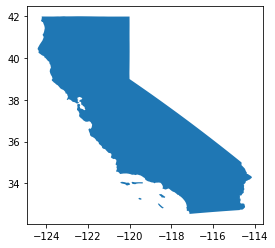

In [49]:
pop_states[pop_states.NAME=="California"].plot()

Alternatively, we can create a *GeoDataFrame* (a dataframe with geospatial data) by loading one of the sample datasets from `geoplot`, in this case the polygones for state boundaries:

In [50]:
path = gplt.datasets.get_path("contiguous_usa")
contiguous_usa = gpd.read_file(path)
contiguous_usa.head()

,state,adm1_code,population,geometry
0,Minnesota,USA-3514,5303925,"POLYGON ((-89.59941 48.01027, -89.48888 48.013..."
1,Montana,USA-3515,989415,"POLYGON ((-111.19419 44.56116, -111.29155 44.7..."
2,North Dakota,USA-3516,672591,"POLYGON ((-96.60136 46.35136, -96.53891 46.199..."
3,Idaho,USA-3518,1567582,"POLYGON ((-111.04973 44.48816, -111.05025 42.0..."
4,Washington,USA-3519,6724540,"POLYGON ((-116.99807 46.33017, -116.90653 46.1..."


Then plot the map of the US states:

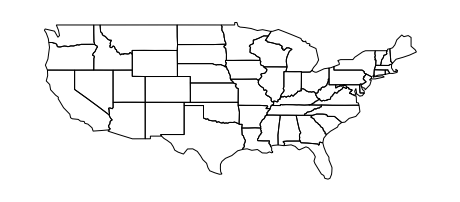

In [51]:
gplt.polyplot(contiguous_usa)

Let's load another sample dataset, in this case for US cities:

In [52]:
path = gplt.datasets.get_path("usa_cities")
usa_cities = gpd.read_file(path)
usa_cities.head()

,id,POP_2010,ELEV_IN_FT,STATE,geometry
0,53,40888.0,1611.0,ND,POINT (-101.29627 48.23251)
1,101,52838.0,830.0,ND,POINT (-97.03285 47.92526)
2,153,15427.0,1407.0,ND,POINT (-98.70844 46.91054)
3,177,105549.0,902.0,ND,POINT (-96.78980 46.87719)
4,192,17787.0,2411.0,ND,POINT (-102.78962 46.87918)


Then plot the locations of each city in the continental US as points:

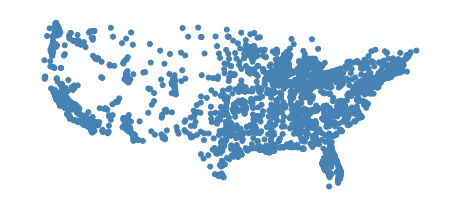

In [53]:
continental_usa_cities = usa_cities.query('STATE not in ["HI", "AK", "PR"]')
gplt.pointplot(continental_usa_cities)

Composing those two, we'll use *overplotting* to show the cities and states in the continental US. Note how the `ax` variable for the state polygons provides an axis on which to plot the cities:

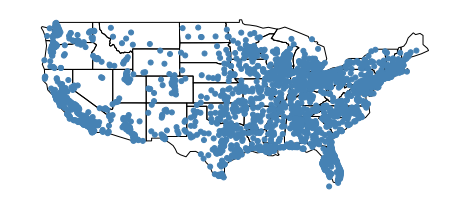

In [54]:
ax = gplt.polyplot(contiguous_usa)
gplt.pointplot(continental_usa_cities, ax=ax)

That looks a bit stretched, so let's adjust the *projection* to use an [Albers equal-area conic projection](https://en.wikipedia.org/wiki/Albers_projection):

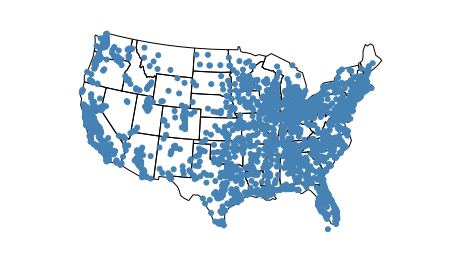

In [55]:
ax = gplt.polyplot(contiguous_usa, projection=gcrs.AlbersEqualArea())
gplt.pointplot(continental_usa_cities, ax=ax)

## Representing Data

Now let's compare several different ways to visualize geospatial data.
First, we'll change the *hue* of a city's plotted point based on that city's elevation, and also add a *legend* for people to decode the meaning of the different hues.
The parameter lists start to get long-ish, so we'll split each parameter into a different line:

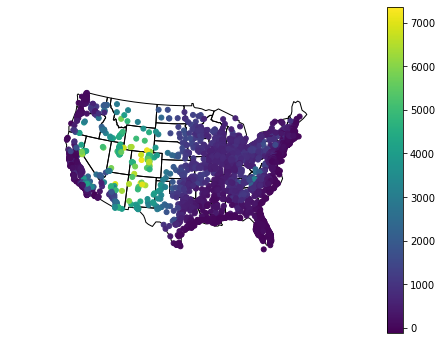

In [56]:
ax = gplt.polyplot(contiguous_usa, projection=gcrs.AlbersEqualArea())

gplt.pointplot(
    continental_usa_cities,
    ax=ax,
    hue="ELEV_IN_FT",
    legend=True
)

We can also use the *scale* of each plotted point to represent another dimension. In this case, the scale of the city points is based on their elevation:

Text(0.5, 1.0, 'Cities in the continental US, by elevation')

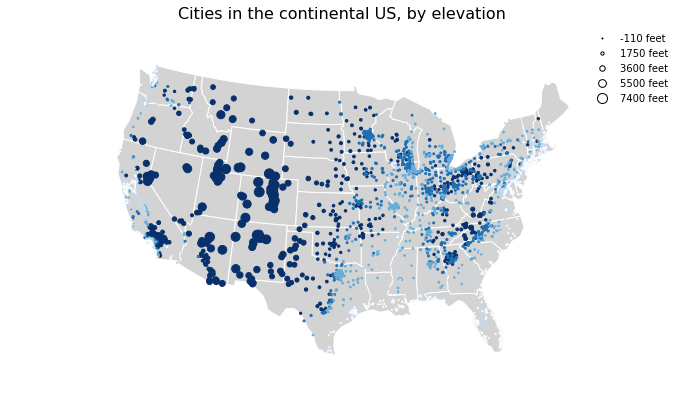

In [57]:
ax = gplt.polyplot(
    contiguous_usa, 
    edgecolor="white",
    facecolor="lightgray",
    figsize=(12, 8),
    projection=gcrs.AlbersEqualArea()
)

gplt.pointplot(
    continental_usa_cities,
    ax=ax,
    hue="ELEV_IN_FT",
    cmap="Blues",
    scheme="quantiles",
    scale="ELEV_IN_FT",
    limits=(1, 10),
    legend=True,
    legend_var="scale",
    legend_kwargs={"frameon": False},
    legend_values=[-110, 1750, 3600, 5500, 7400],
    legend_labels=["-110 feet", "1750 feet", "3600 feet", "5500 feet", "7400 feet"]
)

ax.set_title("Cities in the continental US, by elevation", fontsize=16)

With a *choropleth* we use different hues to shade polygons, to represent a dimension of data:

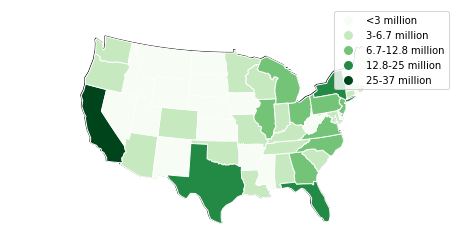

In [58]:
ax = gplt.polyplot(contiguous_usa, projection=gcrs.AlbersEqualArea())

gplt.choropleth(
    contiguous_usa,
    hue="population",
    edgecolor="white",
    linewidth=1,
    cmap="Greens",
    legend=True,
    scheme="FisherJenks",
    legend_labels=[
        "<3 million", "3-6.7 million", "6.7-12.8 million",
        "12.8-25 million", "25-37 million"
    ],
    projection=gcrs.AlbersEqualArea(),
    ax=ax
)

A data smoothing technique known as *kernel density estimation* (KDE) creates contours to represent a dimension of data.
In this case, we'll zoom in to view the traffic collisions in the NYC boroughs:

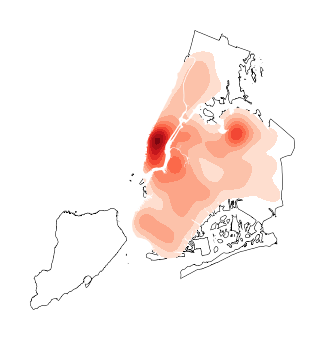

In [59]:
boroughs = gpd.read_file(gplt.datasets.get_path("nyc_boroughs"))
collisions = gpd.read_file(gplt.datasets.get_path("nyc_collision_factors"))

ax = gplt.polyplot(boroughs, projection=gcrs.AlbersEqualArea())
gplt.kdeplot(collisions, cmap="Reds", shade=True, clip=boroughs, ax=ax)

Let's zoom out to try KDE on major population centers throughout the US:

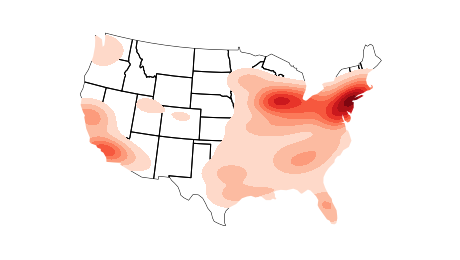

In [60]:
ax = gplt.polyplot(contiguous_usa, projection=gcrs.AlbersEqualArea())

gplt.kdeplot(
    continental_usa_cities, 
    cmap="Reds", 
    shade=True, 
    clip=contiguous_usa, 
    ax=ax
)

This next section shows how to work with data associated with areas (polygons).
We'll load a dataset about obesity rates by US state:

In [61]:
obesity = pd.read_csv(gplt.datasets.get_path("obesity_by_state"), sep="\t")
obesity.head()

,State,Percent
0,Alabama,32.4
1,Missouri,30.4
2,Alaska,28.4
3,Montana,24.6
4,Arizona,26.8


Convert that into a GeoDataFrame using a *join*.
Note how this adds the required `"geometry"` column:

In [62]:
geo_obesity = contiguous_usa.set_index("state").join(obesity.set_index("State"))
geo_obesity.head()

,adm1_code,population,geometry,Percent
state,,,,
Minnesota,USA-3514,5303925,"POLYGON ((-89.59941 48.01027, -89.48888 48.013...",25.5
Montana,USA-3515,989415,"POLYGON ((-111.19419 44.56116, -111.29155 44.7...",24.6
North Dakota,USA-3516,672591,"POLYGON ((-96.60136 46.35136, -96.53891 46.199...",31.0
Idaho,USA-3518,1567582,"POLYGON ((-111.04973 44.48816, -111.05025 42.0...",29.6
Washington,USA-3519,6724540,"POLYGON ((-116.99807 46.33017, -116.90653 46.1...",27.2


Now we can use this data to plot a *cartogram*, which grows or shrinks polygons to represent a dimension of data – in this case, the obesity rates per state:

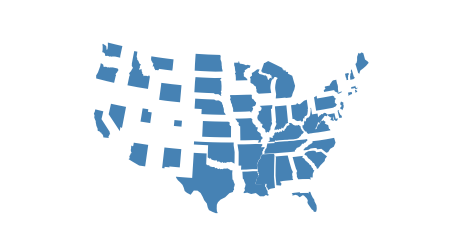

In [63]:
gplt.cartogram(
    geo_obesity,
    scale="Percent",
    projection=gcrs.AlbersEqualArea()
)

One good approach to simplifying data visualization is binning the data into *quantiles*.
These are equal-sized groups, in this case 10 quantiles for elevation:

In [64]:
scheme = mc.Quantiles(continental_usa_cities["ELEV_IN_FT"], k=10)
scheme

Quantiles                 

     Interval        Count
--------------------------
[-112.00,   26.00] |   382
(  26.00,   72.00] |   351
(  72.00,  157.00] |   362
( 157.00,  328.00] |   353
( 328.00,  528.00] |   366
( 528.00,  646.00] |   359
( 646.00,  778.00] |   359
( 778.00,  948.00] |   363
( 948.00, 1310.50] |   359
(1310.50, 7369.00] |   362

Here we've divided the elevations into 10 quantiles with approximately 375 values each.
Now let's assign a different *hue* to each quantile, plus a legend to explain them:

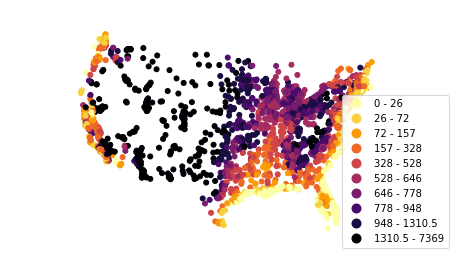

In [65]:
gplt.pointplot(
    continental_usa_cities,
    projection=gcrs.AlbersEqualArea(),
    hue="ELEV_IN_FT",
    scheme=scheme,
    cmap="inferno_r",
    legend=True
)

Note how the *colormap* was changed to `inferno_r`.
Next, let's add a filter for typical warnings that can be ignored:

In [66]:
import warnings

warnings.filterwarnings("ignore", "GeoSeries.isna", UserWarning)

The next example uses a *voronoi diagram*, to calculate polygon areas based on a dimension of the data.
Each polygon is centered on a *generating point*, such that every location in the polygon is closer to its generating point than to any other.

In the following example, we'll plot the locations primary schools in Melbourne, Australia, and use a voronoi diagram to show where they are concentrated:

/home/ceteri/venv/lib/python3.6/site-packages/geoplot/geoplot.py:625: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  extent = gpd.GeoSeries(self.extent) if self.extent is not None else None


Text(0.5, 1.0, 'Primary Schools in Greater Melbourne, 2018')

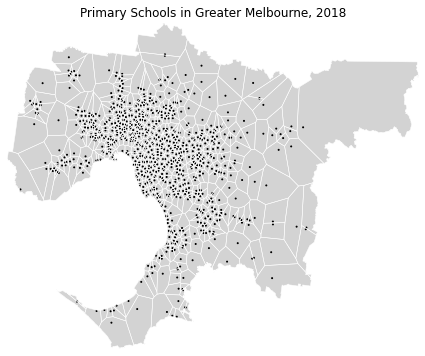

In [67]:
melbourne = gpd.read_file(gplt.datasets.get_path("melbourne"))
df = gpd.read_file(gplt.datasets.get_path("melbourne_schools"))
melbourne_primary_schools = df.query('School_Type == "Primary"')

ax = gplt.voronoi(
    melbourne_primary_schools,
    clip=melbourne,
    linewidth=0.5,
    edgecolor="white",
    projection=gcrs.Mercator()
)

gplt.polyplot(
    melbourne, 
    edgecolor="None", 
    facecolor="lightgray",
    ax=ax
)

gplt.pointplot(
    melbourne_primary_schools,
    color="black",
    ax=ax,
    s=1,
    extent=melbourne.total_bounds
)

plt.title("Primary Schools in Greater Melbourne, 2018")

Let's construct a voronoi diagram for the elevations of US cities.
This is a data smoothing technique since the elevations are for points, but we'll "spread" those values across areas:

/home/ceteri/venv/lib/python3.6/site-packages/geoplot/geoplot.py:625: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  extent = gpd.GeoSeries(self.extent) if self.extent is not None else None


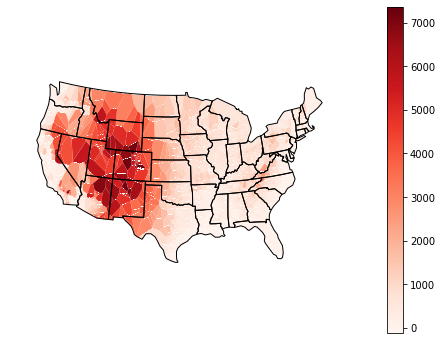

In [68]:
proj = gplt.crs.AlbersEqualArea(
    central_longitude=-98,
    central_latitude=39.5
)

ax = gplt.voronoi(
    continental_usa_cities,
    hue="ELEV_IN_FT",
    clip=contiguous_usa,
    projection=proj,
    cmap="Reds",
    legend=True,
    edgecolor="white",
    linewidth=0.01
)

gplt.polyplot(
    contiguous_usa,
    ax=ax,
    extent=contiguous_usa.total_bounds,
    edgecolor="black",
    linewidth=1,
    zorder=1
)

## Visualizing COVID-19 Data

Next, we'll visualize some of the COVID-19 data from the University of Washington's [IHME](https://covid19.healthdata.org/united-states-of-america) center.

In [69]:
ihme = pd.read_csv("data/Hospitalization_all_locs.csv")
ihme.head()

,location_name,date,allbed_mean,allbed_lower,allbed_upper,ICUbed_mean,ICUbed_lower,ICUbed_upper,InvVen_mean,InvVen_lower,...,newICU_upper,totdea_mean,totdea_lower,totdea_upper,bedover_mean,bedover_lower,bedover_upper,icuover_mean,icuover_lower,icuover_upper
0,Abruzzo,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Abruzzo,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Abruzzo,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Abruzzo,2020-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Abruzzo,2020-01-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We'll filter rows, limiting this visualization to Earth Day (April 22) 2020:

In [70]:
is_earthday = ihme["date"]=="2020-04-22"
is_earthday.head()

0    False
1    False
2    False
3    False
4    False
Name: date, dtype: bool

Now merge on state name with the continental US dataset from earlier:

In [71]:
cv19 = contiguous_usa.merge(ihme[is_earthday], left_on="state", right_on="location_name")
cv19.head()

,state,adm1_code,population,geometry,location_name,date,allbed_mean,allbed_lower,allbed_upper,ICUbed_mean,...,newICU_upper,totdea_mean,totdea_lower,totdea_upper,bedover_mean,bedover_lower,bedover_upper,icuover_mean,icuover_lower,icuover_upper
0,Minnesota,USA-3514,5303925,"POLYGON ((-89.59941 48.01027, -89.48888 48.013...",Minnesota,2020-04-22,324.575350,93.19875,1047.148039,94.219099,...,50.779167,171.975,161.0,205.000,0.0,0.0,0.0,0.0,0.0,0.000000
1,Montana,USA-3515,989415,"POLYGON ((-111.19419 44.56116, -111.29155 44.7...",Montana,2020-04-22,27.096500,5.80000,106.912500,7.215450,...,3.201250,14.271,13.0,19.000,0.0,0.0,0.0,0.0,0.0,0.000000
2,North Dakota,USA-3516,672591,"POLYGON ((-96.60136 46.35136, -96.53891 46.199...",North Dakota,2020-04-22,99.412673,10.90000,373.926786,28.695143,...,22.698077,16.726,13.0,28.000,0.0,0.0,0.0,0.0,0.0,26.148214
3,Idaho,USA-3518,1567582,"POLYGON ((-111.04973 44.48816, -111.05025 42.0...",Idaho,2020-04-22,60.246750,18.64875,161.480000,17.521550,...,5.900000,49.782,48.0,54.000,0.0,0.0,0.0,0.0,0.0,0.000000
4,Washington,USA-3519,6724540,"POLYGON ((-116.99807 46.33017, -116.90653 46.1...",Washington,2020-04-22,463.035901,228.88000,1033.948611,136.228431,...,37.339444,695.345,685.0,719.025,0.0,0.0,0.0,0.0,0.0,0.000000


Add a calculated column for "deaths per million":

In [72]:
deaths_per_mil = cv19["deaths_mean"] / cv19["population"] * 1000000.0
cv19["deaths_per_mil"] = deaths_per_mil

Then to visualize this data, let's plot a choropleth of "deaths per million" per state, and overplot with population per city:

Text(0.5, 1.0, 'COVID-19 deaths/million vs. population, on Earth Day 2020')

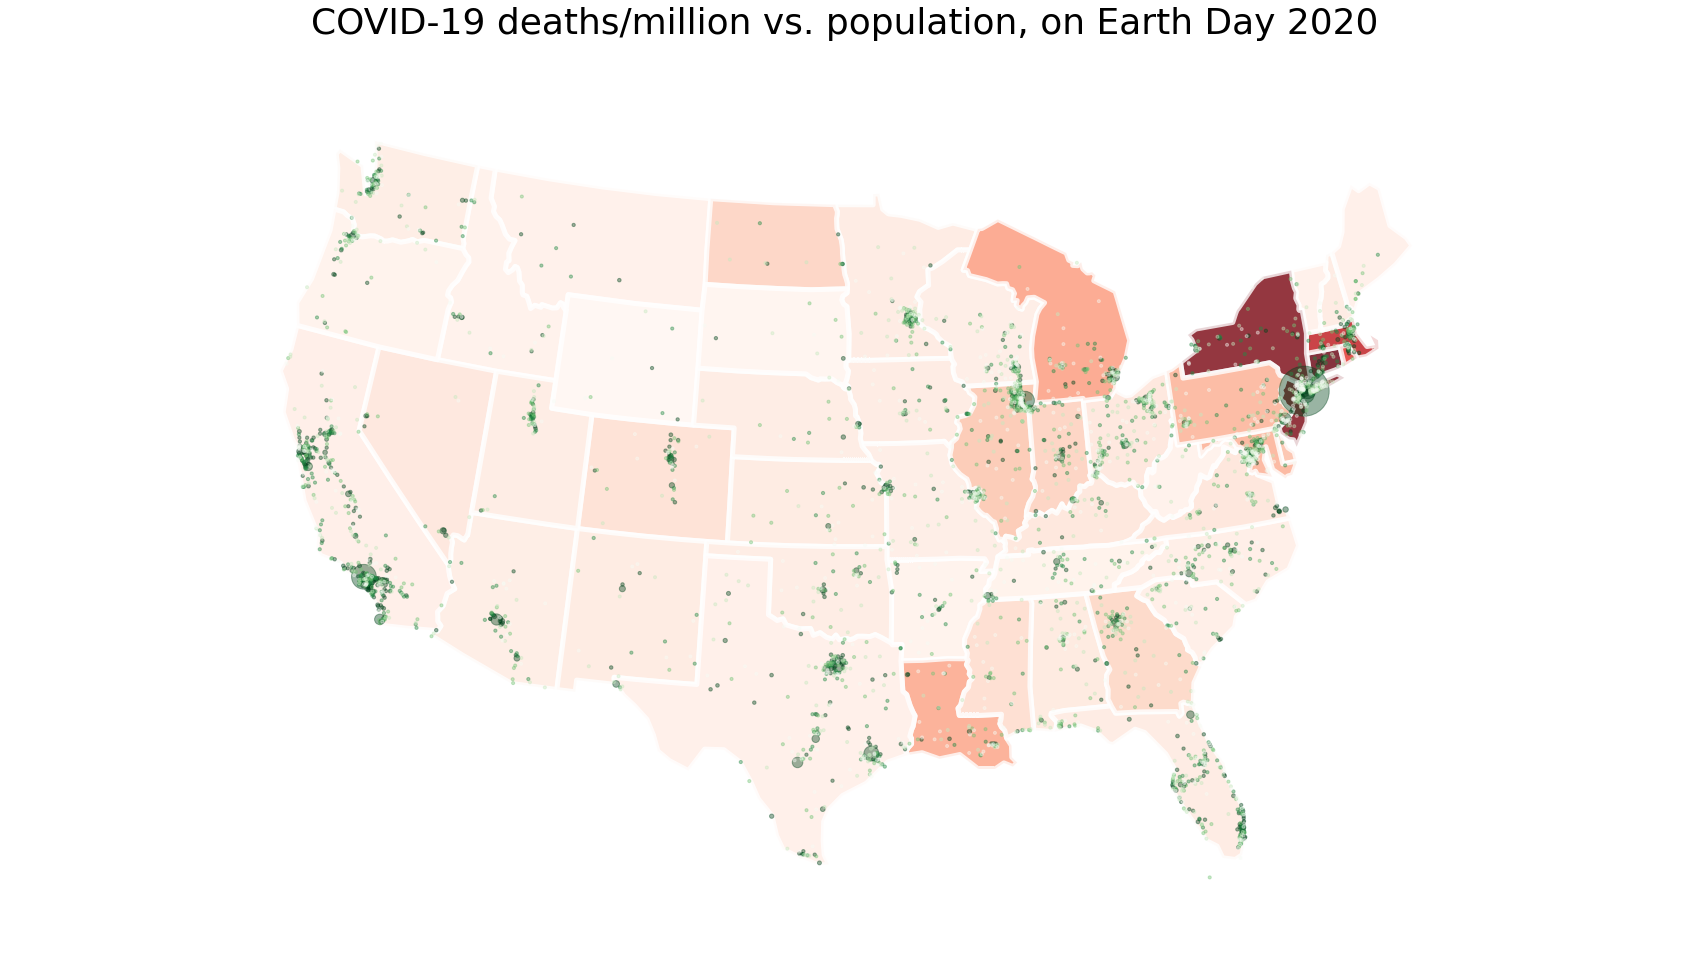

In [73]:
ax = gplt.choropleth(
    cv19,
    hue="deaths_per_mil",
    edgecolor="white",
    linewidth=5,
    cmap="Reds",
    alpha = 0.8,
    projection=gcrs.AlbersEqualArea(),
    figsize=(30, 30)
)

ax = gplt.pointplot(
    continental_usa_cities,
    hue="POP_2010",
    cmap="Greens",
    scheme="quantiles",
    scale="POP_2010",
    limits=(3, 50),
    zorder=2, 
    alpha = 0.4,
    ax=ax
)

ax.set_title(
    "COVID-19 deaths/million vs. population, on Earth Day 2020",
    fontsize=36
)